In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

In [2]:
iris = load_iris()

In [3]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
# загружаем данные в датафрейм
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data_class = iris.target

In [5]:
#оставляем только два признака: длину и ширину чашелистиков
data_small = data[['sepal length (cm)','sepal width (cm)']]

Text(0.5, 1.0, 'Визуализация исходных точек по признакам длины и ширины чашелистиков')

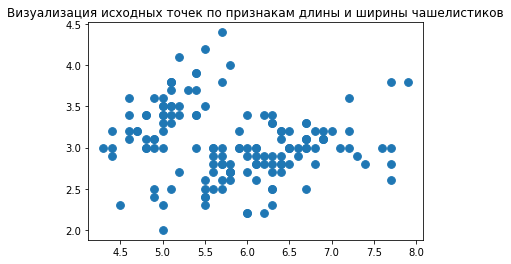

In [7]:
#Визуализация исходных точек по признакам длины и ширины чашелистиков
plt.scatter(data_small['sepal length (cm)'], data_small['sepal width (cm)'], cmap='autumn', s=60)
plt.title('Визуализация исходных точек по признакам длины и ширины чашелистиков')

Text(0, 0.5, 'Кол-во значений')

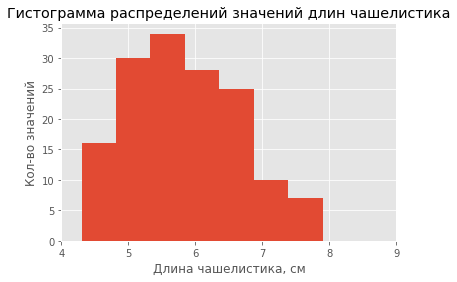

In [8]:
# Оценим возможность применения LDA:
plt.style.use('ggplot')
data_small['sepal length (cm)'].plot(kind='hist', 
                   bins=7,
                   title='Гистограмма распределений значений длин чашелистика',
                   xticks=range(4, 10))
plt.xlabel('Длина чашелистика, см')
plt.ylabel('Кол-во значений')

Text(0, 0.5, 'Кол-во значений')

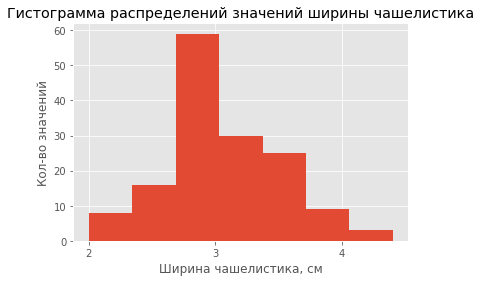

In [9]:
plt.style.use('ggplot')
data_small['sepal width (cm)'].plot(kind='hist', 
                   bins=7,
                   title='Гистограмма распределений значений ширины чашелистика',
                   xticks=range(2, 5))
plt.xlabel('Ширина чашелистика, см')
plt.ylabel('Кол-во значений')

Признаки sepal width (cm) и sepal length (cm) слабо и умеренно коррелируют, данные распределены нормально - применение LDA возможно

In [10]:
# разделяем выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_small, data_class, test_size=0.2)

In [11]:
# импортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [12]:
# создаем пустую LDA:
lda = LinearDiscriminantAnalysis()

In [13]:
# обучаем данные
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [14]:
# делаем прогноз на тестовой выборке
lda_result = lda.predict(X_test)
lda_result

array([2, 2, 0, 2, 0, 2, 2, 0, 1, 2, 0, 0, 2, 0, 1, 0, 2, 2, 2, 0, 0, 2,
       0, 2, 1, 2, 1, 0, 2, 1])

In [15]:
# смотрим разницу факта и прогноза 
result = pd.DataFrame([y_test, lda_result]).T

In [16]:
result

,0,1
0,1,2
1,2,2
2,0,0
3,2,2
4,0,0
5,2,2
6,2,2
7,0,0
8,1,1
9,1,2


In [17]:
# посмотрим расчет точности LDA
from sklearn.metrics import accuracy_score
round(accuracy_score(y_test, lda_result),2)

0.83

In [20]:
# посмотрим на центроиды
lda.means_

array([[4.96666667, 3.38717949],
       [5.8725    , 2.7475    ],
       [6.57317073, 2.95609756]])

Text(0.5, 1.0, 'Визуализация тестовых точек по признакам длины и ширины чашелистиков')

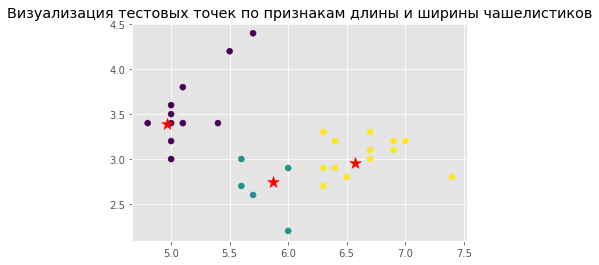

In [22]:
# Визуализируем предсказания для тестовой выборки и построим центры классов 
plt.scatter(X_test['sepal length (cm)'], X_test['sepal width (cm)'], c=lda_result)
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s=150, marker='*') # центроиды
nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))
Z = lda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)
plt.title('Визуализация тестовых точек по признакам длины и ширины чашелистиков')

In [23]:
# приведем данные к единому масштабу
from sklearn.preprocessing import StandardScaler

In [31]:
scaler = StandardScaler()

In [32]:
# Сразу обучаем и преобразываем данные - обучаем на тренировочных данных
X_scaled = scaler.fit_transform(X_train)

In [33]:
# Импортируем метод К-средних
from sklearn.cluster import KMeans

In [34]:
# явно указываем количество кластеров (указан итоговый - выбранный визуально по графику локтя)
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(X_scaled)
clusters

array([0, 2, 1, 1, 1, 2, 0, 0, 1, 0, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 2, 0,
       1, 1, 0, 1, 2, 0, 0, 0, 2, 2, 1, 0, 2, 2, 0, 0, 0, 2, 1, 0, 0, 2,
       2, 1, 1, 1, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 1, 0, 2, 0, 1, 1, 0,
       1, 0, 1, 2, 0, 1, 2, 0, 0, 2, 2, 1, 1, 1, 0, 2, 0, 0, 0, 0, 2, 1,
       0, 1, 2, 2, 2, 1, 1, 0, 0, 1, 2, 0, 0, 2, 2, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 2, 2, 0, 0, 1, 2, 0, 2])

In [35]:
#Находим оптимальное кол-во кластеров
k_inertia = [] # создаем список для инерции
ks = range(1, 20) #Задаем диапазон кластеров

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X_scaled)
    k_inertia.append(clf_kmeans.inertia_) # добавляем инерцию каждой модели в список

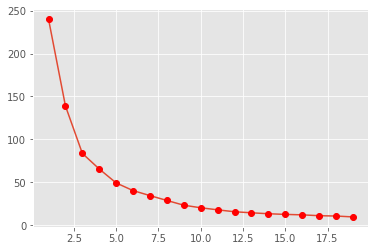

In [36]:
# Строим график локтя, чтобы визуально определить оптимальное кол-во кластеров
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

Из данных графика видно, что оптимальное число кластеров 3

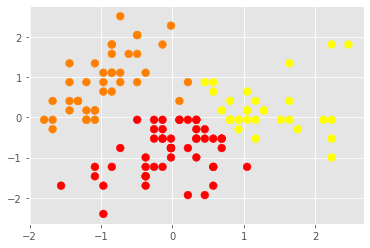

In [37]:
# Визуализация полученной кластеризации методом K-средних
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], cmap='autumn', c=clusters, s=60)